In [1]:
#utils
import emoji, re, string, time, os
from utils import getTestMetrics
import pandas as pd
import numpy as np
from scipy.stats import randint
import pickle

#nlp
import nltk
from nltk.corpus import stopwords
import spacy

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns

#features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

#data balancing
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

%matplotlib inline
sns.set(style="darkgrid")



In [2]:
base = '2020'
subset = 'partial'
results_dir = 'results/' + str(base) + '/' + subset + '/bayopt/'
results_dir

'results/2020/partial/bayopt/'

In [3]:
df = pd.read_csv('data/2020/fakeWhatsApp.BR_2020_partial.csv')
df = df.dropna(subset=['misinformation'])
print(len(df))
df.head(5)  
df = df[['text','misinformation','shares']]
df

1704


text  misinformation  \
0     O ministro da Ciência, Tecnologia, Inovações e...             0.0   
1     Pesquisa com mais de 6.000 médicos em 30 paíse...             1.0   
2     É com muita alegria que comunico que mais um p...             0.0   
3     Renda Brasil unificará vários programas sociai...             0.0   
4     O Secretário-Geral da OTAN Jens Stoltenberg ta...             0.0   
...                                                 ...             ...   
2894  A torcida do corona deve estar arrancando os c...             0.0   
2895  “OS EUA E O CORONAVÍRUS :\r\n\r\nAcabei de ass...             0.0   
2896  Estatísticas falsas conforme depoimentos colhi...             1.0   
2897  Atenção => 🇧🇷💓💓💓 *MUITO IMPORTANTE! "Como é qu...             0.0   
2898  [2:36 PM, 11/06/2020] Wellington: ```*ALERTA A...             1.0   

      shares  
0         27  
1         26  
2         25  
3         25  
4         24  
...      ...  
2894       1  
2895       1  
2896       1  
2897       1  
2898       1  

[1704 rows x 3 columns]

In [4]:
df['cleanLinks'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [5]:
df = df[df['cleanLinks'] != '' ]

In [6]:
df.shape

(1390, 4)

In [7]:
#data_dir = 'data/' + str(base) #+ '/vis_processed_texts.p'
#filepath = 'data/' + str(base) + '/fakeWhatsApp.BR_' + str(base) + '.csv'
#df = pd.read_csv('data/2020/fakeWhatsApp.BR_2020_partial.csv')
#df = df[df['viral']==1]
#df = df[df['midia']==0]
#df = df[df['words']>50]
# print(len(df))
# df.head(5)   

In [8]:
# misinformation = list(df[df['misinformation']==1]['text'])
# misinformation = [preprocess(m,semi=True, rpunct = False, remoji = True) for m in misinformation]
# misinformation = ' '.join(misinformation)
# misinformation

In [9]:
# text_file = open('misinformation.txt','wt')
# text_file.write(misinformation)
# text_file.close()

# Let's take a look in the data

In [10]:
for m in df[df['misinformation']==1]['text'].unique()[0:5]:
    print()
    print(m)
    print()
    print('..................................')


Pesquisa com mais de 6.000 médicos em 30 países diz que hidroxicloroquina é o tratamento mais eficaz para coronavírus.

https://conexaopolitica.com.br/ultimas/pesquisa-com-mais-de-6-000-medicos-em-30-paises-diz-que-hidroxicloroquina-e-o-tratamento-mais-eficaz-para-coronavirus/amp/

..................................

China força países atingidos por vírus chinês a se ajoelharem diante da Huawei: “Nós lhe daremos máscaras se aceitar a Huawei 5G”

https://conexaopolitica.com.br/ultimas/china-forca-paises-atingidos-por-virus-chines-a-se-ajoelharem-diante-da-huawei-nos-lhe-daremos-mascaras-se-aceitar-a-huawei-5g/

..................................

Herança maldita: Mandetta renova contratos de publicidade de R$ 1bilhão firmados no governo Dilma 

De forma silenciosa e sem o aval do planalto, o ministro da saúde Luiz Henrique Mandetta renovou contratos de publiciade que ultrapassam R$ 1 bilhão com agências de publicidade que alimentam a mídia contra o presidente Jair Bolsonaro. 
Não é a t

In [11]:
for m in df[df['misinformation']==0]['text'].unique()[0:5]:
    print()
    print(m)
    print()
    print('..................................')


O ministro da Ciência, Tecnologia, Inovações e Comunicações, Marcos Pontes, afirmou, nesta terça-feira (9), que foram iniciados os novos testes com o vermífugo nitazoxanida em pacientes que tenham sido infectados pelo novo coronavírus. A novidade é que a partir de agora pacientes assintomáticos também serão testados. Basta ter a confirmação do coronavírus. O primeiro protocolo de testes trabalha com pessoas com febre e início de pneumonia, com o chamado “vidro fosco” na tomografia do pulmão.
https://dunapress.org/2020/06/11/governo-jair-bolsonaro-atraves-do-mctic-inicia-segundo-protocolo-de-testes-clinicos-com-a-nitazoxanida/

..................................

É com muita alegria que comunico que mais um pedido nosso relacionado ao Coronavírus foi atendido! O Ministério da Educação decidiu adiantar a formatura dos estudantes de Medicina, Enfermagem e outros cursos da área da Saúde para atuarem nos hospitais no enfrentamento da Covid-19! São mais de 10 mil universitários jovens e cor

# Corpus statistics

In [12]:
#df.describe()[['characters','words','sharings']]

data after remove duplicates


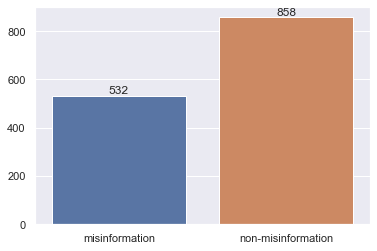

In [13]:
#removing duplicates    
df = df.drop_duplicates(subset=['text'])    
texts = df['text']
y = df['misinformation']

print('data after remove duplicates')
pos_mask = y == 1 
pos = y[pos_mask]
neg_mask = y == 0 
neg = y[neg_mask]
values = [pos.shape[0],neg.shape[0]]
keys = ['misinformation', 'non-misinformation']
g = sns.barplot(x = keys, y = values)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [14]:
print(len(texts))
print(len(y))

1390
1390


In [15]:
def avgSizeWords(string):
    list_string = string.split()
    chars = np.array([len(s) for s in list_string])
    return chars.mean()
df['text'] = [str(t).strip() for t in df['text']]
df['characters'] = [len(t) for t in df['text']]
df['words'] = [len(t.split()) for t in df['text']]
df['types'] = [len(set(t.split())) for t in df['text']]
df['types/token ratio'] = df['types']/df['words']
df['char/word ratio'] = df['characters']/df['words']
df['average chars by word'] = [avgSizeWords(t) for t in df['text']]
df[['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word', 'shares']].describe()

words        types  types/token ratio    characters  \
count  1390.000000  1390.000000        1390.000000   1390.000000   
mean    120.725180    79.912950           0.864712    841.406475   
std     224.351675   124.078415           0.141705   1428.579119   
min       1.000000     1.000000           0.393074      3.000000   
25%      14.000000    13.000000           0.774790    133.000000   
50%      32.000000    30.000000           0.907670    256.500000   
75%     113.000000    87.000000           1.000000    774.000000   
max    3100.000000  1718.000000           1.000000  18203.000000   

       char/word ratio  average chars by word       shares  
count      1390.000000            1390.000000  1390.000000  
mean         16.090771              15.076369     2.502158  
std          54.383908              54.502013     4.354643  
min           3.000000               3.000000     1.000000  
25%           6.008156               4.988487     1.000000  
50%           6.708807               5.634002     1.000000  
75%          11.373950              10.234375     2.000000  
max        1825.500000            1824.500000    27.000000

In [16]:
print('means by class')
mis = df[df['misinformation']==1][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','shares']].mean().to_frame().rename(columns={0: "misinformation"})
non_mis = df[df['misinformation']==0][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','shares']].mean().to_frame().rename(columns={0: "non-misinformation"})
mis.join(non_mis, lsuffix='_misinformation', rsuffix='_non-misinformation')

means by class


misinformation  non-misinformation
words                      167.020677           92.019814
types                      107.234962           62.972028
types/token ratio            0.817212            0.894164
characters                1047.738722          713.470862
char/word ratio              7.085941           21.674185
average chars by word        5.987561           20.711855
shares                       2.479323            2.516317

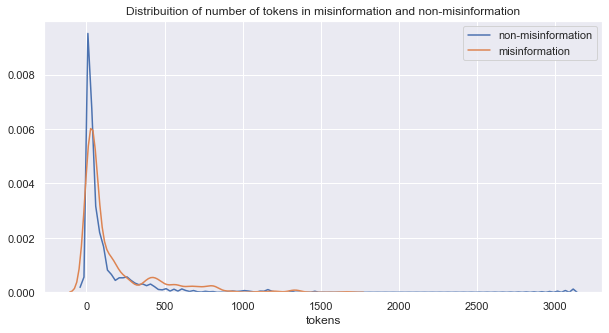

In [17]:
df['tokens'] = df['words']
plt.figure(figsize=(10, 5))
plt.title('Distribuition of number of tokens in misinformation and non-misinformation')
sns.distplot(df[df['misinformation']==0]['tokens'], hist = False, kde = True, label = 'non-misinformation')
sns.distplot(df[df['misinformation']==1]['tokens'], hist = False, kde = True, label = 'misinformation')
plt.show()

In [18]:
# plt.figure(figsize=(20, 8))
# plt.title('misinformation and non-misinformation sharings distribuition')
# sns.distplot(df[df['misinformation']==0]['shares'], hist = False, kde = True, label = 'non-misinformation')
# sns.distplot(df[df['misinformation']==1]['shares'], hist = False, kde = True, label = 'misinformation')
# plt.show()

In [19]:
#emojis and punctuation
emojis_list = list(emoji.UNICODE_EMOJI.keys())
emojis_list += ['\n']
punct = list(string.punctuation) + ['\n']
emojis_punct = emojis_list + punct

def processEmojisPunctuation(text, remove_punct = False, remove_emoji = False):
    '''
    Put spaces between emojis. Removes punctuation.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        
        if remove_punct: #remove punctuation            
            if c in punct: 
                text = text.replace(c, ' ')
        else: #put spaces between punctuation
            if c in punct:
                text = text.replace(c, ' ' + c + ' ')
        
        if remove_emoji: #remove emojis
            if c in emojis_list:
                text = text.replace(c, ' ')
        else: #put spaces between emojis
            if c in emojis_list:
                text = text.replace(c, ' ' + c + ' ')                        
            
    text = re.sub(' +', ' ', text)
    return text

#stop words removal
stop_words = list(stopwords.words('portuguese'))
new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','vc', 'bom', 'ai','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo']
stop_words = stop_words + new_stopwords
final_stop_words = []
for sw in stop_words:
    sw = ' '+ sw + ' '
    final_stop_words.append(sw)

def removeStopwords(text):
    for sw in final_stop_words:
        text = text.replace(sw,' ')
    text = re.sub(' +',' ',text)
    return text

#lemmatization
nlp = spacy.load('pt_core_news_sm')
def lemmatization(text):
    doc = nlp(text)
    for token in doc:
        if token.text != token.lemma_:
            text = text.replace(token.text, token.lemma_)
    return text
    

def domainUrl(text):
    '''
    Substitutes an URL in a text for the domain of this URL
    Input: an string
    Output: the string with the modified URL
    '''    
    if 'http' in text:
        re_url = '[^\s]*https*://[^\s]*'
        matches = re.findall(re_url, text, flags=re.IGNORECASE)
        for m in matches:
            domain = m.split('//')
            domain = domain[1].split('/')[0]
            text = re.sub(re_url, domain, text, 1)
        return text
    else:
        return text
    
def processLoL(text):
    re_kkk = 'kkk*'
    t = re.sub(re_kkk, "kkk", text, flags=re.IGNORECASE)
    return t

def firstSentence(text):
    list_s = re.split('; |\. |\! |\? |\n',text)
    for s in list_s:
        if s is not None:
            return s
    

def preprocess(text,semi=False, rpunct = False, remoji = False, sentence = False):
    if sentence:
        text = firstSentence(text) # remove
    text = text.lower().strip()
    text = domainUrl(text)
    text = processLoL(text)
    text = processEmojisPunctuation(text, remove_punct = rpunct, remove_emoji = remoji)
    if semi:        
        return text
    text = removeStopwords(text)
    text = lemmatization(text)
    return text
           

In [20]:
# just first sentence
if 'sentence' in subset:
    df['pre_processed_text'] = [preprocess(t) for t in texts]
    df['semi_processed_text'] = [preprocess(t,semi=True) for t in texts]


In [21]:
df['pre_processed_text'] = [preprocess(t) for t in texts]
df['semi_processed_text'] = [preprocess(t,semi=True) for t in texts]
# df.to_csv('data/2018/fakeWhatsApp.BR_2018_processed.csv',index = False)

In [22]:
pro_texts = df['pre_processed_text']
semi_pro_texts = df['semi_processed_text']

def trucateText(text):
    words = text.split()
    if len(words) <= 100:
        return text
    else:
        words = words[0:100]
        text = ' '.join(words)
        return text

if 'trunc' in subset:
    pro_texts = [trucateText(t) for t in pro_texts]
    semi_pro_texts = [trucateText(t) for t in semi_pro_texts]
    

In [23]:
list(zip(pro_texts[100:120], semi_pro_texts[100:120]))

[(' * ficarr fácil responsabilizar culparr * \r \n \r \n * responsabilidade governar federal combater coronavírus , segundar stf ? * _ enviar recurso 💵 estar , certar ? _ \r \n \r \n * ser enviar * _ . . _ \r \n \r \n * qualquer outro fato relativo coronavírus , responsável : * _ governador prefeito . _ \r \n \r \n afinal , caber tomar decisão região . \r \n \r \n * ir : * \r \n \r \n * faltar dinheiro : * \r \n culpar governar federal ( mostrar , fascista , assassinar blá blá blá ) \r \n \r \n * aumentar número morte : * \r \n governador prefeito\r \n \r \n * faltar equipamento : * \r \n governador prefeito\r \n \r \n * desviar verba : * \r \n governador prefeito\r \n \r \n * fechar : * \r \n governador prefeito\r \n \r \n * faltar respirador : * \r \n governador prefeito \r \n \r \n * ninguém sair : * \r \n governador prefeito\r \n \r \n * aumentar violência : * \r \n governador prefeito\r \n \r \n * desempregar : * \r \n governador prefeito \r \n \r \n * empresar quebrar : * \r \n g

In [24]:
print(len(pro_texts))
print(len(y))

1390
1390


# Experiments and models

In [25]:
vectorization = ['bow','tfidf']
ngrams = ['-unigram', '-unigram_bigram','-unigram_bigram_trigram']
processed = ['','-pre_processed']
max_features = ['']#,'-max_features']
balancing = ['','-oversampling']
experiments = []

for vec in vectorization:
    for ng in ngrams:
        for p in processed:
            for m in max_features:
                exp = vec+ng+p+m
                experiments.append(exp)

print(len(experiments))
experiments


12


['bow-unigram',
 'bow-unigram-pre_processed',
 'bow-unigram_bigram',
 'bow-unigram_bigram-pre_processed',
 'bow-unigram_bigram_trigram',
 'bow-unigram_bigram_trigram-pre_processed',
 'tfidf-unigram',
 'tfidf-unigram-pre_processed',
 'tfidf-unigram_bigram',
 'tfidf-unigram_bigram-pre_processed',
 'tfidf-unigram_bigram_trigram',
 'tfidf-unigram_bigram_trigram-pre_processed']

In [26]:
models = ['lr','nb','lsvm','sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']
print(len(models))
models

9


['lr', 'nb', 'lsvm', 'sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']

## Train-test split

In [27]:
experiment = experiments[-2]
model = models[0]
print(experiment,model)

tfidf-unigram_bigram_trigram lr


In [28]:
#random state = 42 for reprudictibility
if 'pre_processed' in experiment:
    X_texts = pro_texts
else:
    X_texts = semi_pro_texts
    
texts_train, texts_test, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, 
                                                                    stratify = y, random_state=42)

full_texts_train, full_texts_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, 
                                                                    stratify = y, random_state=42)

## Vectorization

In [29]:
print(experiment,model)

tfidf-unigram_bigram_trigram lr


In [30]:
def defineVectorizing(experiment):
    max_feat = None
    # maximum number of features
    if 'max_features' in experiment:
        max_feat = 5000
    exp_parts = experiment.split('-')
    vec = exp_parts[0]
    ngram = exp_parts[1]
    # ngram
    if ngram == 'unigram':
        ng = (1,1)
    elif ngram == 'unigram_bigram':
        ng = (1,2)
    elif ngram == 'unigram_bigram_trigram':
        ng = (1,3)
    # vectorizer
    if vec == 'bow':
        vectorizer = CountVectorizer(max_features = max_feat, binary=True, ngram_range = ng, lowercase = False, token_pattern = r'[^\s]+')
    elif vec == 'tfidf':
        vectorizer = TfidfVectorizer(max_features = max_feat, ngram_range = ng, lowercase = False, token_pattern = r'[^\s]+')
    
    return vectorizer

def vectorizing(vectorizer,texts_train,texts_test):
    vectorizer.fit(texts_train)   
    X_train = vectorizer.transform(texts_train)
    X_test = vectorizer.transform(texts_test)
    #print('Train:',X_train.shape)
    #print('Test:',X_test.shape)
    return X_train, X_test

vectorizer = defineVectorizing(experiment)
X_train,X_test = vectorizing(vectorizer,texts_train,texts_test)

## Models training and test

In [31]:
def lr_eval(X_train,y_train,X_test,y_test):
    #print('Logistic Regression')
    logreg = LogisticRegression().fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=False)

def nb_eval(X_train,y_train,X_test,y_test):    
    if 'bow' in experiment:
        #print('Bernoulli Naive-Bayes')
        nb = BernoulliNB(alpha=0).fit(X_train, y_train)
    elif 'tfidf' in experiment:
        #print('Complement Naive-Bayes')
        nb = ComplementNB().fit(X_train, y_train)
    # print('Bernoulli Naive-Bayes')
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=False)

def lsvm_eval(X_train,y_train,X_test,y_test):
    #print('Linear Support Vector Machine')
    svm = LinearSVC(C=348.6029694687092,dual=False).fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return getTestMetrics(y_test, y_pred, full_metrics = True,print_charts=False)

def sgd_eval(X_train,y_train,X_test,y_test):
    #print('Linear SVM with SGD training')
    sgd = SGDClassifier(alpha=0.0018406754563272765).fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    return getTestMetrics(y_test, y_pred, full_metrics = True,print_charts=False)

def svm_eval(X_train,y_train,X_test,y_test):
    #print('SVM with RBF kernel')
    #svm = SVC(probability=True).fit(X_train, y_train)
    svc = SVC(probability=True).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_prob = svc.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred,y_prob, full_metrics = True,print_charts=False)

def knn_eval(X_train,y_train,X_test,y_test):
    #print('KNN')
    knn = KNeighborsClassifier(weights='distance',n_jobs=-1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=False)

def rf_eval(X_train,y_train,X_test,y_test):
    #print('Random Forest')
    #rf = RandomForestClassifier(n_estimators=200,n_jobs=-1).fit(X_train, y_train)
    rf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=False)

def gb_eval(X_train,y_train,X_test,y_test):
    #print('Gradient Boosting')
    gb = GradientBoostingClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    y_prob = gb.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=False)

def mlp_eval(X_train,y_train,X_test,y_test):
    #print('Multilayer perceptron')
    mlp = MLPClassifier(verbose=True, early_stopping= True, batch_size=64, n_iter_no_change = 5, tol = 1e-3).fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    y_prob = mlp.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=False)

def model_eval(model,X_train,y_train,X_test,y_test):
    if model == 'lr':
        return lr_eval(X_train,y_train,X_test,y_test)
    elif model == 'nb':
        return nb_eval(X_train,y_train,X_test,y_test)
    elif model == 'lsvm':
        return lsvm_eval(X_train,y_train,X_test,y_test)
    elif model == 'sgd':
        return sgd_eval(X_train,y_train,X_test,y_test)
    elif model == 'svm':
        return svm_eval(X_train,y_train,X_test,y_test)
    elif model == 'knn':
        return knn_eval(X_train,y_train,X_test,y_test)
    elif model == 'rf':
        return rf_eval(X_train,y_train,X_test,y_test)
    elif model == 'gb':
        return gb_eval(X_train,y_train,X_test,y_test)
    elif model == 'mlp':
        return mlp_eval(X_train,y_train,X_test,y_test)

#lsvm_eval(X_train,y_train,X_test,y_test)
print('testing')
model_eval('nb',X_train,y_train,X_test,y_test)

testing
AUC:  0.8840500219394472


(0.7913669064748201,
 0.7264150943396226,
 0.8313953488372093,
 0.7264150943396226,
 0.8313953488372093,
 0.7264150943396227,
 0.8313953488372093,
 0.8840500219394472)

In [32]:
def buildResults(models,vocab, accuracy_score, precision_score, precision_score_neg,recall_score, recall_score_neg, f1_score, f1_score_neg, auc_score):
    df_metrics = pd.DataFrame({'model':models,                                 
                                 'vocab':[vocab]*len(models),
                                 'auc': auc_score,
                                 'accuracy':accuracy_score,
                                 'precision 1': precision_score,
                                 'recall 1': recall_score,
                                 'f1 score 1': f1_score,
                                 'precision 0': precision_score_neg,
                                 'recall 0': recall_score_neg,                                 
                                 'f1 score 0': f1_score_neg
                                 })    
    df_metrics['precision avg'] = (df_metrics['precision 1'] + df_metrics['precision 0'])/2
    df_metrics['recall avg'] = (df_metrics['recall 1'] + df_metrics['recall 0'])/2
    df_metrics['f1 avg'] = (df_metrics['f1 score 1'] + df_metrics['f1 score 0'])/2
    df_metrics['fpr'] = 1 - df_metrics['recall 0']
    return df_metrics


In [33]:
results_dir

'results/2020/partial/bayopt/'

# Run experiments

In [ ]:
def runExperimentsTrainTest(experiments, models):
    total_start_time = time.time()
    
    for experiment in experiments:
        
        #if the experiment was already made, continue
        #results_dir = 'results/2018/viral_2/ml/'
        experiment_file = experiment + '.csv'
        filepath = results_dir + experiment_file
        print(filepath)
        list_files = os.listdir(results_dir)
        if experiment_file in list_files:
            continue        
        
        #measure experiment time
        start_time = time.time()
        
        # train-test split
        if 'pre_processed' in experiment:
            X_texts = pro_texts
        else:
            X_texts = semi_pro_texts
        texts_train, texts_test, y_train, y_test = train_test_split(X_texts, y, 
                                                                    test_size=0.2, stratify = y, 
                                                                    random_state=42)        
        # features
        vectorizer = defineVectorizing(experiment)
        X_train,X_test = vectorizing(vectorizer,texts_train,texts_test)
        vocab = X_train.shape[1]
        
        # metrics
        accuracy_score = []
        precision_score = []
        precision_score_neg = []
        recall_score = []
        recall_score_neg = []
        f1_score = []
        f1_score_neg = []
        auc_score = []
        
        experiment_time = time.time()
        for model in models:
            acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc = model_eval(model,
                                                                                                X_train,
                                                                                                y_train,
                                                                                                X_test,
                                                                                                y_test)
            accuracy_score.append(acc)
            precision_score.append(precision)
            precision_score_neg.append(precision_neg)
            recall_score.append(recall)
            recall_score_neg.append(recall_neg)
            f1_score.append(f1)
            f1_score_neg.append(f1_neg)
            auc_score.append(roc_auc)
            
        df_metrics = buildResults(models,vocab,accuracy_score,
                                  precision_score,precision_score_neg,
                                  recall_score,recall_score_neg,
                                  f1_score,f1_score_neg,auc_score)


            
        df_metrics.to_csv(filepath,index=False)
        end_time = time.time()
        ellapsed_time = end_time - start_time
        print(experiment + ' time (minutes):', ellapsed_time/60)
    
    total_end_time = time.time()
    total_ellapsed_time = total_end_time - total_start_time
    print()
    print('---------------------')
    print()
    print('TOTAL time (minutes):', total_ellapsed_time/60)  

In [ ]:
runExperimentsTrainTest(experiments,models)

# K-Folds

In [34]:
def kFoldsEvaluate(model,experiment,X_texts):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    auc_list = []
    fpr_list = []
    vocabs = []
    
    skf = StratifiedKFold(n_splits=5)
    i=0
    for train_index, test_index in skf.split(X_texts, y):
        i+=1
        X_train, X_test = np.array(X_texts)[train_index], np.array(X_texts)[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
        
        if 'oversampling' in experiment:
            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)

        # vectorization
        vectorizer = defineVectorizing(experiment)
        X_train,X_test = vectorizing(vectorizer, X_train, X_test)
        vocab = X_train.shape[1]
        #print(vocab)
        # model
        print(model + str(i))
        acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc = model_eval(model,
                                                                                                    X_train,
                                                                                                    y_train,
                                                                                                    X_test,
                                                                                                    y_test)
        vocabs.append(vocab)
        accuracy_list.append(acc)
        precision_list.append(precision)
        recall_list.append(recall)    
        f1_list.append(f1)    
        auc_list.append(roc_auc)
        fpr_list.append(1-recall_neg)

    vocab_mean = np.floor(np.array(vocabs).mean())
    accuracy_mean = np.array(accuracy_list).mean()
    precision_mean = np.array(precision_list).mean()
    recall_mean = np.array(recall_list).mean()
    f1_mean = np.array(f1_list).mean()
    auc_mean = np.array(auc_list).mean()
    fpr_mean = np.array(fpr_list).mean()
    
    accuracy_std = np.array(accuracy_list).std()
    precision_std = np.array(precision_list).std()
    recall_std = np.array(recall_list).std()
    f1_std = np.array(f1_list).std()
    auc_std = np.array(auc_list).std()
    fpr_std = np.array(fpr_list).std()
    
    return vocab_mean, accuracy_mean, accuracy_std, precision_mean,precision_std, recall_mean, recall_std, f1_mean, f1_std, auc_mean, auc_std, fpr_mean, fpr_std
#kFoldsEvaluate(model,experiment,X_texts)

In [35]:
def buildResultsKFold(models,vocab,metrics_list):
    df_metrics = pd.DataFrame({'model':models,
                               'vocab':[vocab]*len(models),
                               'acc_mean': metrics_list[0],
                               'acc_std': metrics_list[1],
                               'pre_mean': metrics_list[2],
                               'pre_std': metrics_list[3],
                               'rec_mean': metrics_list[4],
                               'rec_std': metrics_list[5],
                               'f1_mean': metrics_list[6],
                               'f1_std': metrics_list[7],
                               'auc_mean': metrics_list[8],
                               'auc_std': metrics_list[9],
                               'fpr_mean': metrics_list[10],
                               'fpr_std': metrics_list[11]
                              })    
#     df_metrics['precision avg'] = (df_metrics['precision 1'] + df_metrics['precision 0'])/2
#     df_metrics['recall avg'] = (df_metrics['recall 1'] + df_metrics['recall 0'])/2
#     df_metrics['f1 avg'] = (df_metrics['f1 score 1'] + df_metrics['f1 score 0'])/2
#     df_metrics['fpr'] = 1 - df_metrics['recall 0']
    return df_metrics

In [36]:
def runExperimentsKFolds(experiments, models):
    total_start_time = time.time()
    
    for experiment in experiments:
        
        #if the experiment was already made, continue
        #results_dir = 'results/2018/k-fold/ml/'
        experiment_file = experiment + '.csv'
        filepath = results_dir + experiment_file
        print(filepath)
        list_files = os.listdir(results_dir)
        if experiment_file in list_files:
            continue        
        
        #measure experiment time
        start_time = time.time()
        
        # train-test split
        if 'pre_processed' in experiment:
            X_texts = pro_texts
        else:
            X_texts = semi_pro_texts
        
        # metrics
        acc_mean = []
        acc_std = []
        pre_mean = []
        pre_std = []
        rec_mean = []
        rec_std = []
        f1_score_mean = []
        f1_score_std = []
        auc_score_mean = []
        auc_score_std = []
        fpr_score_mean = []
        fpr_score_std = []       
        
        
        
        experiment_time = time.time()
        for model in models:
            vocab, accuracy_mean, accuracy_std, precision_mean,precision_std, recall_mean, recall_std, f1_mean, f1_std, auc_mean, auc_std, fpr_mean, fpr_std = kFoldsEvaluate(model,experiment,X_texts)
            
            acc_mean.append(accuracy_mean)
            acc_std.append(accuracy_std)
            pre_mean.append(precision_mean)
            pre_std.append(precision_std)
            rec_mean.append(recall_mean)
            rec_std.append(recall_std)
            f1_score_mean.append(f1_mean)
            f1_score_std.append(f1_std)
            auc_score_mean.append(auc_mean)
            auc_score_std .append(auc_std)
            fpr_score_mean.append(fpr_mean)
            fpr_score_std.append(fpr_std)
            
             

        metrics_list = [acc_mean,
                        acc_std,
                        pre_mean,
                        pre_std,
                        rec_mean,
                        rec_std,
                        f1_score_mean,
                        f1_score_std,
                        auc_score_mean,
                        auc_score_std,
                        fpr_score_mean,
                        fpr_score_std]
        
        end_time = time.time()
        ellapsed_time = end_time - start_time
        print(experiment + ' time (minutes):', ellapsed_time/60)
        
        # save results
        df_metrics = buildResultsKFold(models,vocab,metrics_list)            
        df_metrics.to_csv(filepath,index=False)
        

    
    total_end_time = time.time()
    total_ellapsed_time = total_end_time - total_start_time
    print()
    print('---------------------')
    print()
    print('TOTAL time (minutes):', total_ellapsed_time/60) 


In [37]:
experiments[-1]

'tfidf-unigram_bigram_trigram-pre_processed'

In [38]:
runExperimentsKFolds(experiments, models)

results/2020/partial/bayopt/bow-unigram.csv
lr1
AUC:  0.9099385695480474
lr2
AUC:  0.9499780605528741
lr3
AUC:  0.8973782360684511
lr4
AUC:  0.843799529977592
lr5
AUC:  0.8307919331037874
nb1
AUC:  0.934730144800351
nb2
AUC:  0.9224440544098289
nb3
AUC:  0.8907141290039491
nb4
AUC:  0.8565885117778871
nb5
AUC:  0.793572716838826
lsvm1
lsvm2
lsvm3
lsvm4
lsvm5
sgd1
sgd2
sgd3
sgd4
sgd5
svm1
AUC:  0.8826239578762615
svm2
AUC:  0.9488810881965773
svm3
AUC:  0.8717090829311102
svm4
AUC:  0.8579548559873202
svm5
AUC:  0.8033557413783681
knn1
AUC:  0.7398804300131637
knn2
AUC:  0.7903685827117155
knn3
AUC:  0.6916410706450198
knn4
AUC:  0.6717221402415696
knn5
AUC:  0.7516532764934143
rf1
AUC:  0.8678971039929794
rf2
AUC:  0.9413119789381307
rf3
AUC:  0.8797718297498903
rf4
AUC:  0.8262283434442804
rf5
AUC:  0.8301634147674481
gb1
AUC:  0.8961715664765249
gb2
AUC:  0.9448222904782799
gb3
AUC:  0.907607503290917
gb4
AUC:  0.8583647592501503
gb5
AUC:  0.8138219380226266
mlp1
Iteration 1, loss = 

Iteration 10, loss = 0.04286828
Validation score: 0.803571
Iteration 11, loss = 0.04284334
Validation score: 0.803571
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.914326458973234
mlp4
Iteration 1, loss = 0.58932133
Validation score: 0.794643
Iteration 2, loss = 0.35472996
Validation score: 0.848214
Iteration 3, loss = 0.24234321
Validation score: 0.875000
Iteration 4, loss = 0.17867360
Validation score: 0.857143
Iteration 5, loss = 0.12910152
Validation score: 0.866071
Iteration 6, loss = 0.10404926
Validation score: 0.866071
Iteration 7, loss = 0.07945472
Validation score: 0.857143
Iteration 8, loss = 0.07583670
Validation score: 0.866071
Iteration 9, loss = 0.05643086
Validation score: 0.866071
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.8787232879707055
mlp5
Iteration 1, loss = 0.58431773
Validation score: 0.794643
Iteration 2, loss = 0.33839809
Validation score: 0.821429
I

knn2
AUC:  0.6252742430890741
knn3
AUC:  0.57629442738043
knn4
AUC:  0.6082964420396787
knn5
AUC:  0.6542056074766354
rf1
AUC:  0.8602731461167179
rf2
AUC:  0.9267770952172005
rf3
AUC:  0.8606022378236068
rf4
AUC:  0.848855003552495
rf5
AUC:  0.8344537355850685
gb1
AUC:  0.8568451075032909
gb2
AUC:  0.9242540587977184
gb3
AUC:  0.9022871873628785
gb4
AUC:  0.8494288681204568
gb5
AUC:  0.8159261081051539
mlp1
Iteration 1, loss = 0.60990443
Validation score: 0.758929
Iteration 2, loss = 0.27407801
Validation score: 0.812500
Iteration 3, loss = 0.15219306
Validation score: 0.803571
Iteration 4, loss = 0.09554879
Validation score: 0.830357
Iteration 5, loss = 0.06271644
Validation score: 0.830357
Iteration 6, loss = 0.04593129
Validation score: 0.821429
Iteration 7, loss = 0.04340778
Validation score: 0.839286
Iteration 8, loss = 0.03087512
Validation score: 0.839286
Iteration 9, loss = 0.02183738
Validation score: 0.839286
Iteration 10, loss = 0.02075016
Validation score: 0.830357
Iterati

C:\Users\antdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9112000877577885
lr4


C:\Users\antdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.8529813630649833
lr5
AUC:  0.827239438159261
nb1
AUC:  0.9212922334357174
nb2
AUC:  0.9175625274243089
nb3
AUC:  0.9008885476086003
nb4
AUC:  0.8533092856752473
nb5
AUC:  0.799038093676559
lsvm1
lsvm2
lsvm3
lsvm4
lsvm5
sgd1
sgd2
sgd3
sgd4
sgd5
svm1
AUC:  0.8398420359806932
svm2
AUC:  0.9251316366827556
svm3
AUC:  0.8643593681439228
svm4
AUC:  0.8481171776794011
svm5
AUC:  0.8089850795212329
knn1
AUC:  0.6513273365511189
knn2
AUC:  0.6533293111013603
knn3
AUC:  0.5864962702939884
knn4
AUC:  0.592118926599989
knn5
AUC:  0.6377548231950593
rf1
AUC:  0.842063405002194
rf2
AUC:  0.9219778411584029
rf3
AUC:  0.8593132953049585
rf4
AUC:  0.8369131551620483
rf5
AUC:  0.8215007924796415
gb1
AUC:  0.8735739359368144
gb2
AUC:  0.9611671785870995
gb3
AUC:  0.9057426502852128
gb4
AUC:  0.8621905230365634
gb5
AUC:  0.8127561895392688
mlp1
Iteration 1, loss = 0.60607141
Validation score: 0.723214
Iteration 2, loss = 0.20722775
Validation score: 0.821429
Iteration 3, loss = 0.09930205
Validati

Iteration 8, loss = 0.01108471
Validation score: 0.857143
Iteration 9, loss = 0.00911915
Validation score: 0.857143
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.8171831447778324
bow-unigram_bigram_trigram-pre_processed time (minutes): 7.973210732142131
results/2020/partial/bayopt/tfidf-unigram.csv
lr1
AUC:  0.8800460728389644
lr2
AUC:  0.9568889863975428
lr3
AUC:  0.8731351469942957
lr4
AUC:  0.8583374323659616
lr5
AUC:  0.7959774826474285
nb1
AUC:  0.8944164107064502
nb2
AUC:  0.9526656428258008
nb3
AUC:  0.9064831066257131
nb4
AUC:  0.851942941465814
nb5
AUC:  0.7434005574684374
lsvm1
lsvm2
lsvm3
lsvm4
lsvm5
sgd1
sgd2
sgd3
sgd4
sgd5
svm1
AUC:  0.906812198332602
svm2
AUC:  0.9579311101360246
svm3
AUC:  0.8926064063185608
svm4
AUC:  0.8596491228070176
svm5
AUC:  0.8151063015794938
knn1
AUC:  0.815269855199649
knn2
AUC:  0.870447564721369
knn3
AUC:  0.8384159719175077
knn4
AUC:  0.7807017543859649
knn5
AUC:  0.7362955675793844
rf1
A

Iteration 11, loss = 0.09883533
Validation score: 0.821429
Iteration 12, loss = 0.08447654
Validation score: 0.830357
Iteration 13, loss = 0.07240073
Validation score: 0.830357
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.9623738481790258
mlp3
Iteration 1, loss = 0.67853687
Validation score: 0.732143
Iteration 2, loss = 0.60198438
Validation score: 0.848214
Iteration 3, loss = 0.50800078
Validation score: 0.875000
Iteration 4, loss = 0.40684585
Validation score: 0.848214
Iteration 5, loss = 0.31897506
Validation score: 0.848214
Iteration 6, loss = 0.24919735
Validation score: 0.848214
Iteration 7, loss = 0.19682365
Validation score: 0.848214
Iteration 8, loss = 0.15801956
Validation score: 0.839286
Iteration 9, loss = 0.12831437
Validation score: 0.839286
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.900669153137341
mlp4
Iteration 1, loss = 0.69328149
Validation score: 0.741071


Iteration 10, loss = 0.03599012
Validation score: 0.848214
Iteration 11, loss = 0.02962496
Validation score: 0.848214
Iteration 12, loss = 0.02468915
Validation score: 0.848214
Iteration 13, loss = 0.02129830
Validation score: 0.848214
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.8105700388041756
tfidf-unigram_bigram time (minutes): 6.25115137497584
results/2020/partial/bayopt/tfidf-unigram_bigram-pre_processed.csv
lr1
AUC:  0.8754387889425187
lr2
AUC:  0.9429574374725758
lr3
AUC:  0.8829530495831505
lr4
AUC:  0.8742416789637645
lr5
AUC:  0.8083838880690823
nb1
AUC:  0.8999561211057482
nb2
AUC:  0.9461386573058359
nb3
AUC:  0.9104322071083809
nb4
AUC:  0.8561512816308685
nb5
AUC:  0.7616549161064655
lsvm1
lsvm2
lsvm3
lsvm4
lsvm5
sgd1
sgd2
sgd3
sgd4
sgd5
svm1
AUC:  0.8970491443615622
svm2
AUC:  0.9428477402369461
svm3
AUC:  0.8822400175515577
svm4
AUC:  0.8756080231731977
svm5
AUC:  0.8181122588402471
knn1
AUC:  0.7473398420359807
k

Iteration 9, loss = 0.04016026
Validation score: 0.803571
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.9410925844668715
mlp3
Iteration 1, loss = 0.68416913
Validation score: 0.758929
Iteration 2, loss = 0.49881974
Validation score: 0.830357
Iteration 3, loss = 0.32276566
Validation score: 0.839286
Iteration 4, loss = 0.20288466
Validation score: 0.839286
Iteration 5, loss = 0.13176175
Validation score: 0.821429
Iteration 6, loss = 0.08906041
Validation score: 0.821429
Iteration 7, loss = 0.06560476
Validation score: 0.812500
Iteration 8, loss = 0.04982727
Validation score: 0.821429
Iteration 9, loss = 0.04124294
Validation score: 0.812500
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.9209631417288284
mlp4
Iteration 1, loss = 0.64744190
Validation score: 0.723214
Iteration 2, loss = 0.46838276
Validation score: 0.785714
Iteration 3, loss = 0.30635869
Validation score: 0.812500
It

## Results

In [39]:
results_dir = 'results/' + str(base) + '/' + subset + '/bayopt/'
results_dir

'results/2020/partial/bayopt/'

In [40]:
experiment = experiments[-1]
filepath = results_dir + experiment + '.csv'
print(filepath)

results/2020/partial/bayopt/tfidf-unigram_bigram_trigram-pre_processed.csv


In [41]:
df_metrics = pd.read_csv(filepath)
df_metrics

model     vocab  acc_mean   acc_std  pre_mean   pre_std  rec_mean   rec_std  \
0    lr  147900.0  0.789928  0.028560  0.766497  0.061037  0.659619  0.067739   
1    nb  147900.0  0.784892  0.071777  0.745581  0.131670  0.725410  0.050356   
2  lsvm  147900.0  0.803597  0.052602  0.737936  0.094692  0.791201  0.052537   
3   sgd  147900.0  0.803597  0.022590  0.790314  0.053910  0.672738  0.075661   
4   svm  147900.0  0.797842  0.030044  0.803335  0.070616  0.637154  0.068319   
5   knn  147900.0  0.708633  0.051023  0.593206  0.058551  0.813860  0.040796   
6    rf  147900.0  0.779137  0.040288  0.837684  0.060264  0.522606  0.089736   
7    gb  147900.0  0.796403  0.030318  0.750754  0.071929  0.721725  0.049618   
8   mlp  147900.0  0.796403  0.064732  0.761961  0.129528  0.753394  0.088759   

    f1_mean    f1_std  auc_mean   auc_std  fpr_mean   fpr_std  
0  0.705234  0.043889  0.871656  0.040712  0.164008  0.024860  
1  0.726578  0.061268  0.877456  0.059151  0.180165  0.074578  
2  0.758246  0.047559  0.000000  0.000000  0.167397  0.055783  
3  0.722362  0.039385  0.000000  0.000000  0.152794  0.019302  
4  0.706195  0.043550  0.879559  0.037102  0.154899  0.026275  
5  0.683380  0.034727  0.797277  0.041353  0.272399  0.064381  
6  0.640653  0.081634  0.861161  0.039148  0.159761  0.026429  
7  0.731687  0.024829  0.869765  0.041039  0.165134  0.032310  
8  0.743481  0.048442  0.894866  0.046816  0.173432  0.073705

In [42]:
df_metrics = pd.read_csv(filepath)
df_metrics['vocab'] = df_metrics['vocab'].astype('int64') 
# df_metrics['fpr'] = 1 - df_metrics['recall 0']
df_metrics = df_metrics.rename(columns={"precision 1": "pre", "recall 1": "rec", "f1 score 1":"f1-score"})
pd.set_option('precision', 3)
cm = sns.light_palette("gray", as_cmap=True)
df_metrics = df_metrics[['vocab','model','fpr','pre','rec', 'f1-score']]
df_metrics.style.background_gradient(cmap='binary')

#[['model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']]
#df_metrics[['model', 'vocab', 'acc_mean', 'pre_mean', 'rec_mean', 'f1_mean', 'auc_mean', 'fpr_mean']].style.background_gradient(cmap=cm)
#df_metrics[['model', 'vocab', 'acc_mean', 'pre_mean', 'rec_mean', 'f1_mean', 'auc_mean', 'fpr_mean']].style.background_gradient(cmap='cm')

KeyError: "['rec', 'fpr', 'f1-score', 'pre'] not in index"

In [43]:
from IPython.display import display

In [44]:
# ONLY FOR K-FOLD
def meanStdToString(mean,std):
    plusminus = ' ± '
    mean = str(mean)[0:5]
    std = str(std)[0:4]
    return str(mean)+plusminus+str(std)    

def highlight_max(x):
    if (x == df_metrics['Model']).all() or (x == df_metrics['vocab']).all():
        return ['' for v in x]
    elif (x == df_metrics['FPR']).all():
        return ['font-weight: bold' if v == x.min() else '' for v in x]
        
    return ['font-weight: bold' if v == x.max() else '' for v in x]



# experiment = experiments[i]
# print(str(i) + ' ' + experiment)
# i+=1

for filename in os.listdir(results_dir):
    experiment = filename.replace('.csv','')
    file_path = results_dir + filename
    print(file_path)

    df_metrics = pd.read_csv(file_path)    
    df_metrics['Model'] = [x.upper() for x in df_metrics['model']]
    df_metrics['ACC'] = df_metrics.apply(lambda x: meanStdToString(x['acc_mean'], x['acc_std']),axis=1)
    df_metrics['PRE'] = df_metrics.apply(lambda x: meanStdToString(x['pre_mean'], x['pre_std']),axis=1)
    df_metrics['REC'] = df_metrics.apply(lambda x: meanStdToString(x['rec_mean'], x['rec_std']),axis=1)
    df_metrics['F1'] = df_metrics.apply(lambda x: meanStdToString(x['f1_mean'], x['f1_std']),axis=1)
    df_metrics['FPR'] = df_metrics.apply(lambda x: meanStdToString(x['fpr_mean'], x['fpr_std']),axis=1)

    styles = [dict(selector="caption", 
        props=[("text-align", "center"),
        ("font-size", "120%"),
        ("color", 'black'),
        ("font-weight", "bold")])] 

    style = df_metrics[['Model','FPR','PRE','REC','F1']].style.apply(highlight_max)
    title = experiment.upper() + '. Features: ' + str(df_metrics.iloc[0].values[1])
    sheet = experiment.upper() + ' ' + str(df_metrics.iloc[0].values[1])
    sheet = sheet.replace('PRE_PROCESSED','PRE')
    sheet = sheet.replace('GRAM','')
    print(title)
    style = style.set_caption(title).set_table_styles(styles)
    #print(style.to_latex(index=False))
    
    print()
    display(style)
    print()
    #style.to_excel("results/2018/k-fold/plots/" + title + ".xlsx") 

results/2020/partial/bayopt/bow-unigram-pre_processed.csv
BOW-UNIGRAM-PRE_PROCESSED. Features: 13039.0




results/2020/partial/bayopt/bow-unigram.csv
BOW-UNIGRAM. Features: 15165.0




results/2020/partial/bayopt/bow-unigram_bigram-pre_processed.csv
BOW-UNIGRAM_BIGRAM-PRE_PROCESSED. Features: 70986.0




results/2020/partial/bayopt/bow-unigram_bigram.csv
BOW-UNIGRAM_BIGRAM. Features: 84189.0




results/2020/partial/bayopt/bow-unigram_bigram_trigram-pre_processed.csv
BOW-UNIGRAM_BIGRAM_TRIGRAM-PRE_PROCESSED. Features: 147900.0




results/2020/partial/bayopt/bow-unigram_bigram_trigram.csv
BOW-UNIGRAM_BIGRAM_TRIGRAM. Features: 190376.0




results/2020/partial/bayopt/tfidf-unigram-pre_processed.csv
TFIDF-UNIGRAM-PRE_PROCESSED. Features: 13039.0




results/2020/partial/bayopt/tfidf-unigram.csv
TFIDF-UNIGRAM. Features: 15165.0




results/2020/partial/bayopt/tfidf-unigram_bigram-pre_processed.csv
TFIDF-UNIGRAM_BIGRAM-PRE_PROCESSED. Features: 70986.0




results/2020/partial/bayopt/tfidf-unigram_bigram.csv
TFIDF-UNIGRAM_BIGRAM. Features: 84189.0




results/2020/partial/bayopt/tfidf-unigram_bigram_trigram-pre_processed.csv
TFIDF-UNIGRAM_BIGRAM_TRIGRAM-PRE_PROCESSED. Features: 147900.0




results/2020/partial/bayopt/tfidf-unigram_bigram_trigram.csv
TFIDF-UNIGRAM_BIGRAM_TRIGRAM. Features: 190376.0



# Best results

In [45]:
# best results analysis TRAIN-TEST
df_best = pd.DataFrame(columns=df_metrics.columns)
df_best
 #iterates over files
exp = []
metric = 'f1-score'
for filename in os.listdir(results_dir):
    if 'max_features' in filename:
        continue
    exp.append(str(filename).replace('.csv',''))
    file_path = results_dir + filename
    df_temp = pd.read_csv(file_path)
    df_temp = df_temp.rename(columns={"precision 1": "pre", "recall 1": "rec", "f1 score 1":"f1-score"})
    df_temp = df_temp[['vocab','model','fpr','pre','rec', 'f1-score']]
    best_ix = df_temp[metric].argmax() #f1-score
    best = df_temp.iloc[best_ix]
    df_best = df_best.append(best)
    #df_best = df_best.append(df_temp[df_temp['model']=='knn'])
    
df_best['vocab'] = df_best['vocab'].astype('int64')    
df_best['experiment'] = exp
cols = df_best.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_best = df_best[cols]
df_best = df_best.sort_values(by=metric,ascending=False)
df_best = df_best.reset_index()
df_best = df_best.drop(columns = ['index'])
df_best.style.background_gradient(cmap='Blues')

# df_best = df_best.sort_values(by=metric,ascending=False)
# df_best = df_best.reset_index()
# df_best = df_best.drop(columns = ['index'])
# df_best[['experiment','model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']].style.background_gradient(cmap='Blues')

KeyError: "['rec', 'fpr', 'f1-score', 'pre'] not in index"

In [46]:
# best results analysis K-FOLD
# df_best = pd.DataFrame(columns=df_metrics.columns)

# #iterates over files
# exp = []
# metric = 'f1_mean'
# for filename in os.listdir(results_dir):
#     if 'max_features' in filename:
#         continue
#     exp.append(str(filename).replace('.csv',''))
#     file_path = results_dir + filename
#     df_temp = pd.read_csv(file_path)
#     best_ix = df_temp[metric].argmax() #f1 score
#     best = df_temp.iloc[best_ix]
#     df_best = df_best.append(best)
#     #df_best = df_best.append(df_temp[df_temp['model']=='knn'])
    
# df_best['vocab'] = df_best['vocab'].astype('int64')    
# df_best['experiment'] = exp
# cols = df_best.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# df_best = df_best[cols]

# df_best = df_best.sort_values(by=metric,ascending=False)
# df_best = df_best.reset_index()
# df_best = df_best.drop(columns = ['index'])
# df_best[['experiment','model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']].style.background_gradient(cmap='Blues')

In [47]:
# best results analysis K-FOLD
df_best = pd.DataFrame(columns=df_metrics.columns)
df_list = []

#iterates over files
exp = []
metric = 'f1_mean'
for filename in os.listdir(results_dir):
    if 'max_features' in filename:
        continue
    exp.append(str(filename).replace('.csv',''))
    name_exp = (str(filename).replace('.csv',''))
    file_path = results_dir + filename
    df_temp = pd.read_csv(file_path)
    df_temp['experiment'] = [name_exp]*len(df_temp)
    df_list.append(df_temp)
    
df_best = pd.concat(df_list)
df_best['vocab'] = df_best['vocab'].astype('int64')    
cols = df_best.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_best = df_best[cols]
df_best = df_best.sort_values(by=metric,ascending=False)
df_best = df_best.reset_index()
df_best = df_best.drop(columns = ['index'])
df_best['feature/model'] = df_best['experiment'] +['_']*len(df_best['model']) + df_best['model']
df_best[['feature/model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']].style.background_gradient(cmap='Blues')

In [ ]:
def adjustExp(string):
    string = string.upper()
    string = string.replace('UNIGRAM','1')
    string = string.replace('_BIGRAM',',2')
    string = string.replace('_TRIGRAM',',3')
    string = string.replace('PRE_PROCESSED','STOPWORDS-LEMMA')
    return string

metric = 'f1_mean'
df_best['features/model'] = df_best['experiment'] +['-']*len(df_best['model']) + df_best['model']
df_best['features/model'] = [adjustExp(t) for t in df_best['features/model']]
df_best = df_best.sort_values(by=metric,ascending=False)

keys = df_best['features/model']
values = df_best[metric]
sns.set(style="ticks")

plt.figure(figsize=(8, 5))
g = sns.barplot(x = values,y = keys,color='C1')

for p in g.patches:
    g.annotate(format(p.get_width(), '.3f'), (p.get_width()*0.90, 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')
    
# for p in g.patches:
#     g.annotate(format(p.get_width(), '.3f'), (p.get_y() + p.get_height() / 2., 
#                                                p.get_width()), ha = 'center', 
#                va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [ ]:
df_best[['features/model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']][0:10] #.to_string(index=False))

In [ ]:
dif = values.max()-values.min()
dif=dif*100/values.min()
print('%.3f'%dif)
values

In [ ]:
metric = 'rec_mean'
df_best = df_best.sort_values(by=metric,ascending=False)
x = df_best['experiment']
y = df_best[metric]
plt.figure(figsize=(8, 5))
sns.barplot(y,x,color='C0')

In [ ]:
df_best['model'].value_counts()

In [ ]:
print('total experiments:',len(df_best)*len(df_metrics))